# A Brief look at Monoceros R2

### In this notebook, we examine some Mid-infrared data of the HII region Monoceros R2 as a starting point for a deeper investigation into this source

## Introduction

#### Let's begin by looking at some images of Monoceros R2 from the web to become more familiar with its geometric properties

### Exhibit A

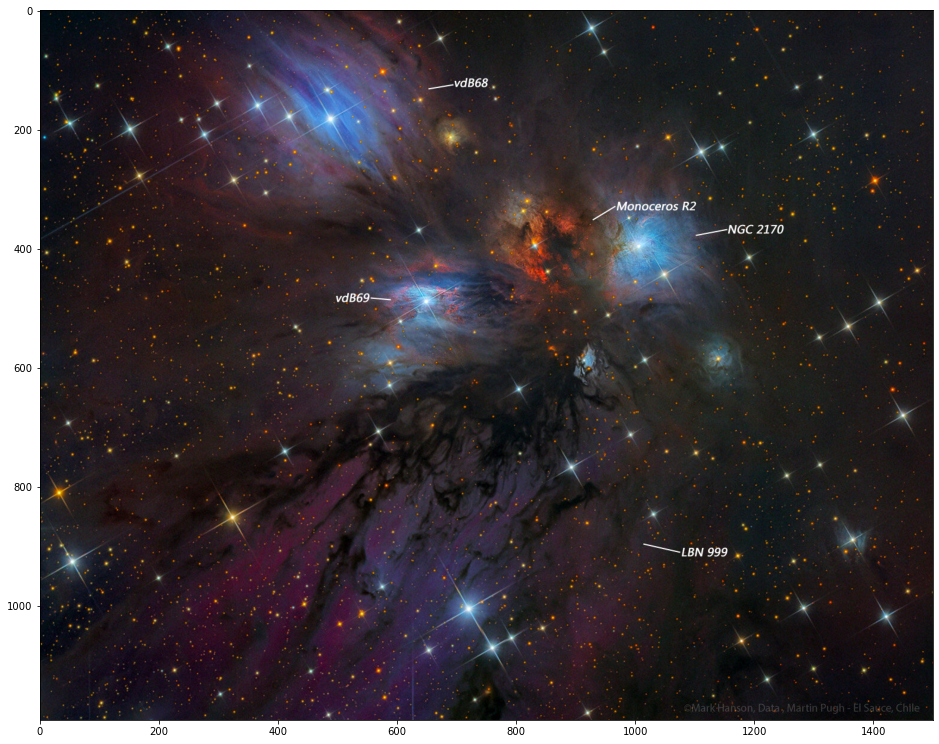

In [1]:
# Import some visualization tools
import imageio 
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# Import jpg of source in optical and plot
im = imageio.imread("images/ngc2170_lbl.jpg")
plt.figure(figsize=(16,16))
plt.imshow(im, cmap='Greys_r')

######  Image retrieved from https://www.hansonastronomy.com/ngc-2170chile

###### From http://annesastronomynews.com/photo-gallery-ii/nebulae-clouds/ngc-2170-by-adam-block/,


"NGC 2170 is a dusty reflection nebula and stellar nursery that formed about 6 to 10 million years ago, located at the edge of the elliptically shaped, giant star-forming molecular cloud Monoceros R2 (Mon R2), some 2,700 light-years away in the constellation of Monoceros.

In fact, NGC 2170 is just the blue nebula in the upper left corner, while this enigmatic region — of more than 15 light-years across — in this image, displays a mix of nebula types.

The bluish areas are reflection nebulae, so-named because they reflect the light of nearby hot stars. The dust particle size in these areas preferentially reflects blue light, similar to cigarette and other kinds of smoke. The red areas are emission nebulae, and shine because ultraviolet light from nearby stars excites hydrogen and other gas atoms in the nebula, which then emit light of their own in specific colors. Finally, what looks a bit like black ink spilled across the image are dark absorption nebulae, and are only seen because of the light that they block. In other words, the dark nebula is seen in silhouette.

There are tell-tale signs of ongoing star formation and massive young stars mostly hidden behind the thick interstellar dust, which strongly absorbs ultraviolet and visible light. Energetic winds and intense radiation from these hot young stars reshape their natal interstellar clouds."

### Exhibit B

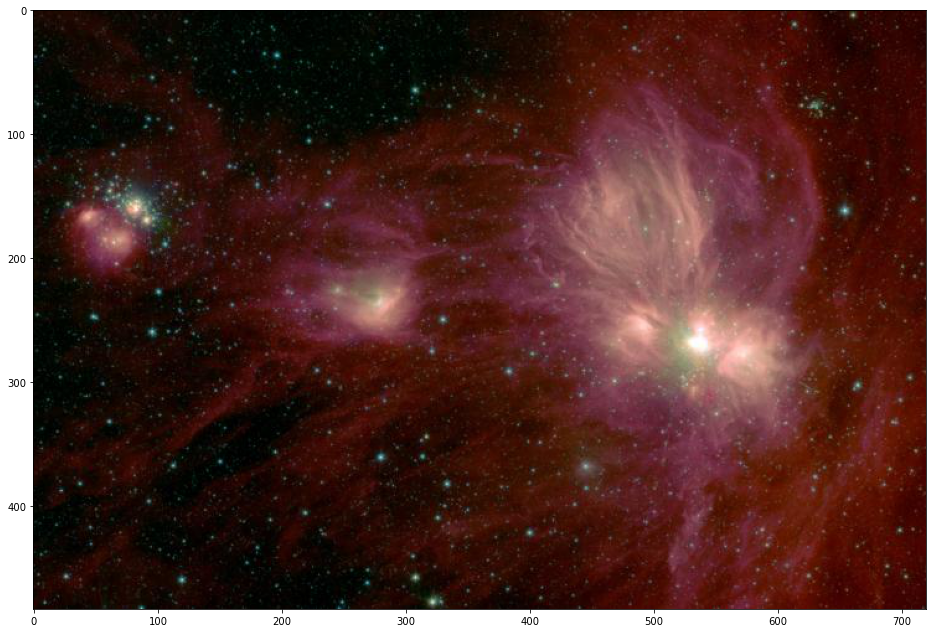

In [2]:
#Import another image of source in mid-infrared 
im = imageio.imread("images/MonR2.jpg")
plt.rcParams["axes.grid"] = False
plt.figure(figsize=(16,16))
plt.imshow(im)

##### CREDIT: UMass Amherst/ Robert Gutermuth

##### https://www.eurekalert.org/multimedia/pub/133781.php

### Exhibit C

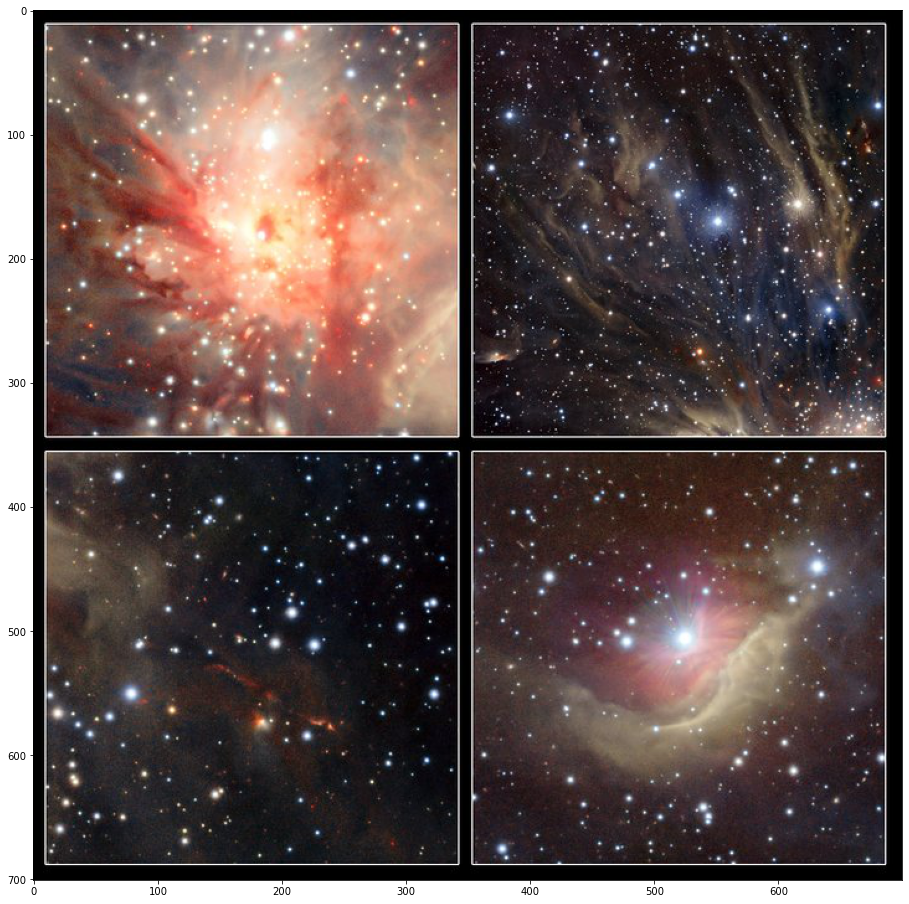

In [3]:
#import a third image near-infrared which highlights some of the extended diffuse emission
im = imageio.imread("images/eso1039c.jpg")
plt.rcParams["axes.grid"] = False
plt.figure(figsize=(16,16))
plt.imshow(im)

#####  This composite image shows extracts from the VISTA image of the Monoceros R2 star forming region.

##### Credit: ESO/J. Emerson/VISTA. Acknowledgment: Cambridge Astronomical Survey Unit

##### https://www.eso.org/public/images/eso1039c/

## 1. Exploratory Imaging

#### First  import the necessary libraries to read a fits file and visualize the data 

In [4]:
#import additional visualization libraries 
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import numpy as np
np.set_printoptions(precision=4, suppress= True)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

#### Read in WISE 12 micron image of Mon R2

In [5]:
image_file = get_pkg_data_filename('fits/monr2_w3.fits')
image_w3 = fits.getdata(image_file, ext=0)
fits.info(image_file) #look at file information

Filename: fits\monr2_w3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (4095, 4095)   float32   


#### Try plotting image

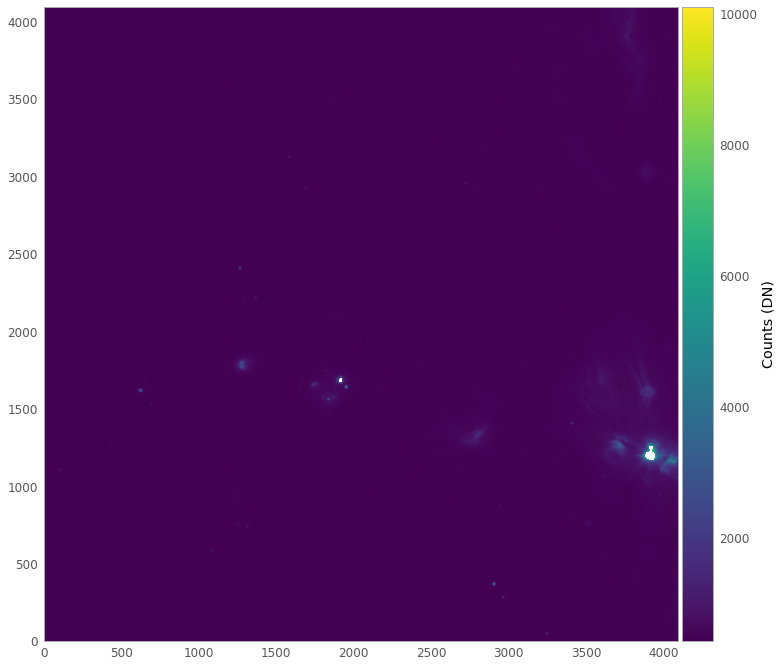

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable # used to align colorbar

plt.rcParams["axes.grid"] = False
plt.figure(figsize=(12,12))
ax =plt.gca()
im =ax.imshow(image_w3, cmap='viridis',origin='lower')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar =plt.colorbar(im,cax=cax)
label="Counts (DN)"
cbar.set_label(label)

####  There are clearly a few issues here that must be resolved. First, this field of view is much larger than our source, which can be seen in the bottom right quadrant. Thus, it makes sense to cut out a subimage from this frame.

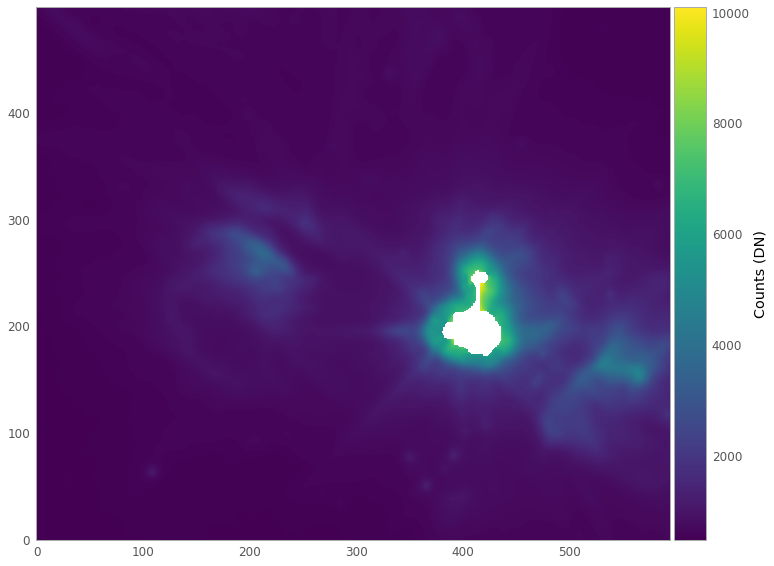

In [7]:
#make subimage
a1=1000
a2=1500
b1 =3500
b2 = 4095
image_w3_cut = image_w3[a1:a2,b1:b2]

#plot subimage
plt.figure(figsize=(12,12))
ax =plt.gca()
im =ax.imshow(image_w3_cut, cmap='viridis',origin='lower')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar =plt.colorbar(im,cax=cax)
cbar.set_label(label)

#### The scaling could also be improved, check out the range of the emission included using a histogram

In [8]:
#reshape subimage into a 1D vector to input into histogram
type(image_w3_cut)
image_w3_cut.size 

image_w3_vec=image_w3_cut.reshape(image_w3_cut.size)

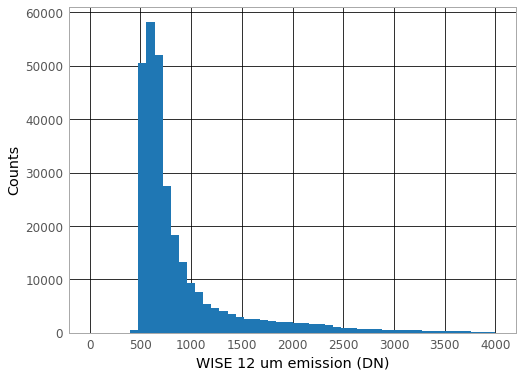

In [9]:
#Make histogram of emission distribution
plt.hist(image_w3_vec,bins = 50,range=(0,4000),color='tab:blue')
plt.xlabel('WISE 12 um emission (DN)')
plt.ylabel('Counts')
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.grid(color='black')
plt.show()

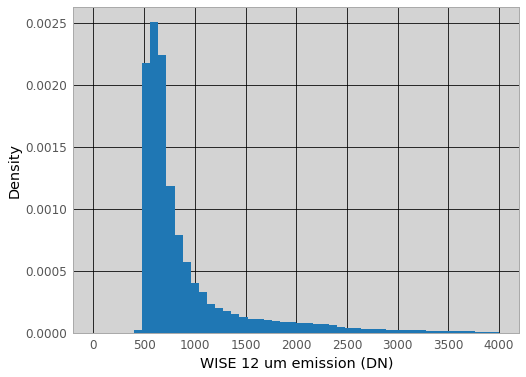

In [10]:
#normalized version
plt.hist(image_w3_vec,bins = 50,range=(0,4000),color='tab:blue', density=True)
plt.xlabel('WISE 12 um emission (DN)')
plt.ylabel('Density')
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.grid(color='black')
plt.show()

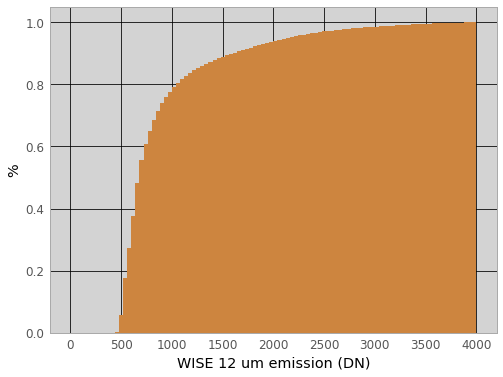

In [11]:
#Cumulative distribution
plt.hist(image_w3_vec,bins = 100,range=(0,4000),color='peru', density=True,cumulative=True)
plt.xlabel('WISE 12 um emission (DN)')
plt.ylabel('%')
plt.rcParams['axes.facecolor'] = 'ivory'
plt.grid(color='black')
plt.show()


#### Clearly most of the emission diversity is between 500--1000 DN. Looks like a square root distribution with an offset of ~500..

In [12]:
#Do some quick statistics excluding NaNs (all values in DN)
print('max = ',np.nanmax(image_w3_cut))
print('min = ',np.nanmin(image_w3_cut))
print('range =',np.nanmax(image_w3_cut) -np.nanmin(image_w3_cut))
print('mean = ',np.nanmean(image_w3_cut) )
print('median = ',np.nanmedian(image_w3_cut) )
print('mean = ',np.nanmean(image_w3_cut) )
print('std = ', np.nanstd(image_w3_cut))
pcent = np.nanpercentile(image_w3_cut, [5,95])
print("5th percentile = {} & 95th percentile = {}".format(pcent[0],pcent[1]))

max =  10100.173
min =  474.39743
range = 9625.775
mean =  988.4387
median =  693.0412
mean =  988.4387
std =  844.49786
5th percentile = 517.6047882080078 & 95th percentile = 2458.3808715820296


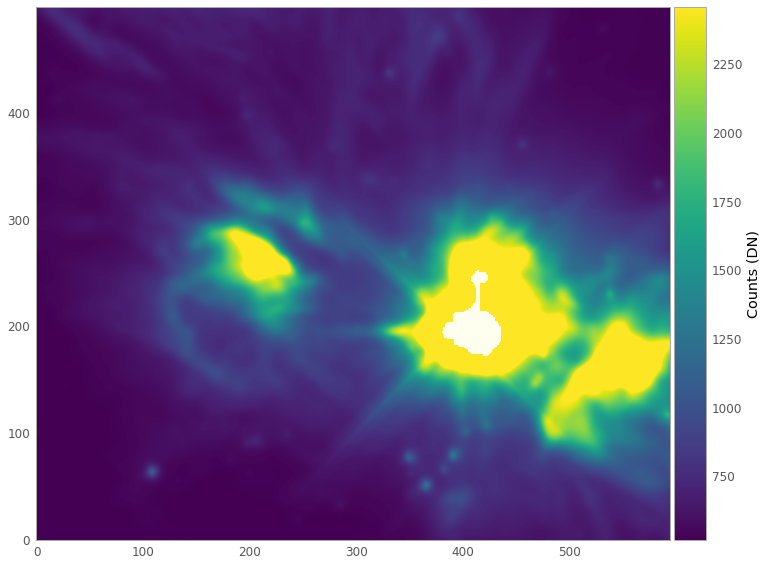

In [13]:
#replot with scaled colorbar (from 5th to 95th percentile)
plt.figure(figsize=(12,12))
ax =plt.gca()
im =ax.imshow(image_w3_cut, cmap='viridis',origin='lower', vmax= pcent[0], vmin =pcent[1])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar =plt.colorbar(im,cax=cax)
cbar.set_label(label)

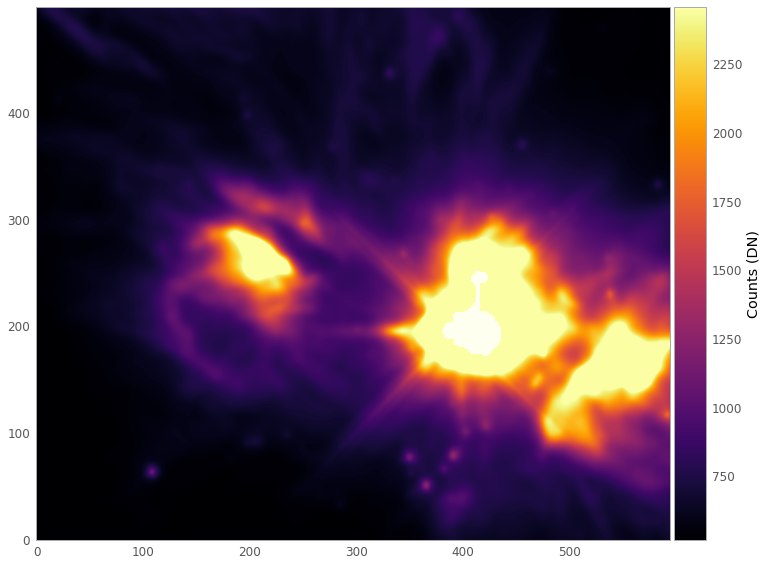

In [14]:
#try a different colormap
plt.figure(figsize=(12,12))
ax =plt.gca()
im =ax.imshow(image_w3_cut,cmap='inferno',origin='lower', vmax= pcent[0], vmin =pcent[1])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar =plt.colorbar(im,cax=cax)
cbar.set_label(label)

#### There is a lot of filamentary structure at lower emission levels (< 750) that isn't visible with a linear color map. A different mapping may help.

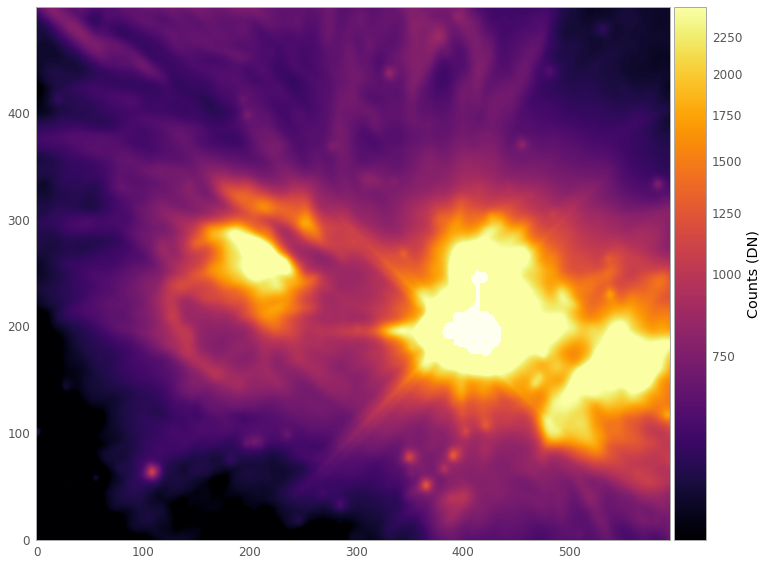

In [15]:
#try a square-root scaling
import matplotlib.colors as colors

plt.figure(figsize=(12,12))
ax =plt.gca()
im=ax.imshow(image_w3_cut, cmap='inferno',origin='lower',norm=colors.PowerNorm(gamma=0.5,  vmax= pcent[1], vmin =pcent[0]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar =plt.colorbar(im,cax=cax)
cbar.set_label(label)

#### Here the filamentary structure looks to extend beyond the subimage we defined

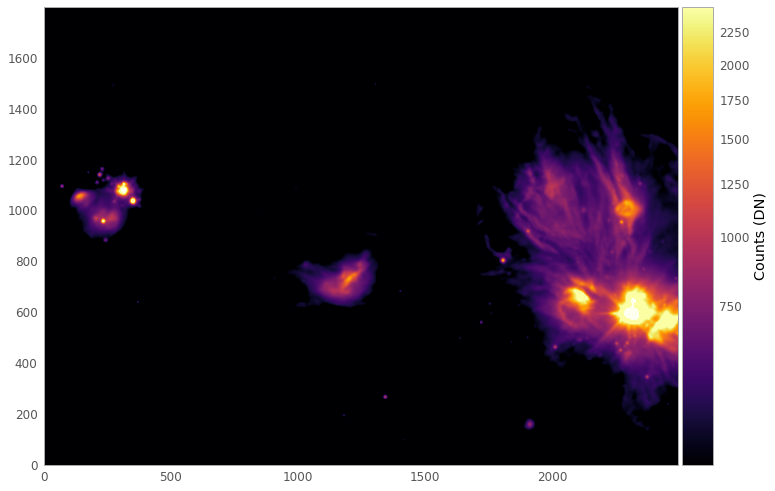

In [16]:
#refine range of subimage and replot to check if the extent of the filaments can be better seen
a1=600
a2=2400
b1 =1600
b2 = 4095
plt.figure(figsize=(12,12))
ax =plt.gca()
im=ax.imshow(image_w3[a1:a2,b1:b2], cmap='inferno',origin='lower',norm=colors.PowerNorm(gamma=0.5,  vmax= pcent[1], vmin =pcent[0]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar =plt.colorbar(im,cax=cax)
cbar.set_label(label)

### This looks a lot like Exhibit B in terms of overall structure though the lower emission boundary cuts off too abruptly 

In [17]:
#redefine subimage based on wider view
image_w3_cut=image_w3[a1:a2,b1:b2]

#redefine image range
pcent = np.nanpercentile(image_w3_cut, [0.25,99.75]) # use larger range to better define the weaker filamentary structure
print("0.25th percentile = {} & 99.75th percentile = {}".format(pcent[0],pcent[1]))

0.25th percentile = 438.2822367858887 & 99.75th percentile = 2864.2686608887047


#### There looks to be some bad pixels in the center of the nebula outlined in yellow above. This could indicate saturation on the detector in the brightest portion of Mon R2.

In [18]:
#Make a mask for all bad pixels in our subimage
image_w3_mask = np.zeros(image_w3_cut.shape)
bad_pixels =np.where(np.isnan(image_w3_cut))
image_w3_mask[bad_pixels]=1

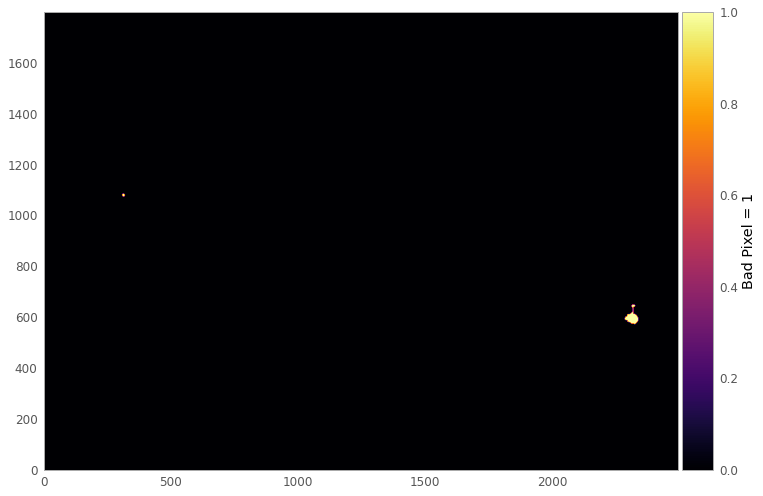

In [19]:
#plot bad pixel mask
plt.figure(figsize=(12,12))
ax =plt.gca()
im=ax.imshow(image_w3_mask, cmap='inferno',origin='lower')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar =plt.colorbar(im,cax=cax)
cbar.set_label("Bad Pixel = 1")

#### As suspected, the bad pixels are concentrated in the center of the HII region. Thus, it would be a good idea to find another data product that will provide us with more information about this source. However this WISE 12 um frame is far from useless. We can use the coordinate information to find or plan other observations centered on this source. 

## 2. Astrometry 

#### Obtain the wcs information

In [20]:
#Import wcs object from wcs API
from astropy.wcs import WCS

In [21]:
# read in image and data header with coordinate info
header_data_unit_list = fits.open('fits/monr2_w3.fits')
header_data_unit_list.info()
image = header_data_unit_list[0].data
header = header_data_unit_list[0].header
wcs_mon_r2 = WCS(header)
wcs_mon_r2 # Check wcs info

Filename: fits/monr2_w3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (4095, 4095)   float32   


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 92.658571  -6.057778  
CRPIX : 2048.0  2048.0  
NAXIS : 4095  4095

#### Replot entire image with the new scaling parameters defined in part 1

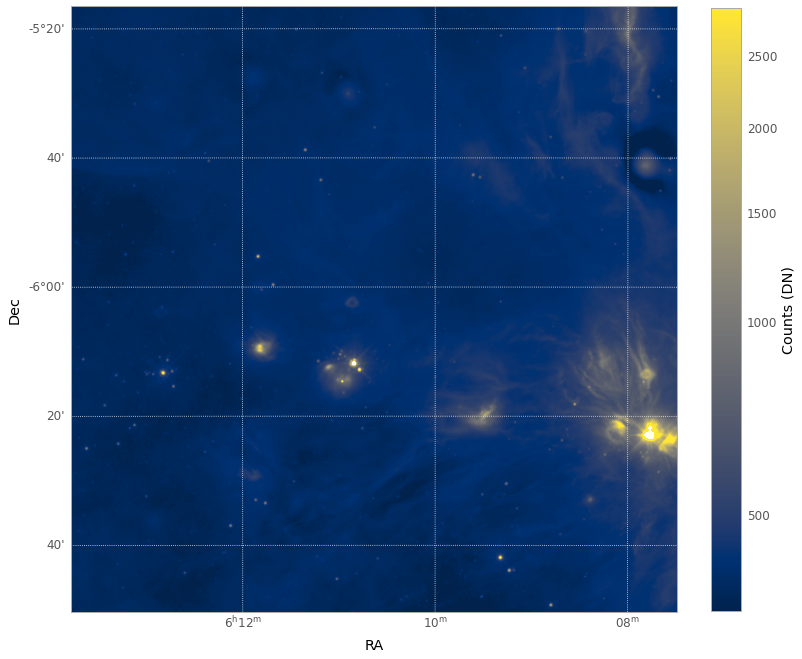

In [22]:
#Try yet another colortable with sky coordinates shown
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(projection=wcs_mon_r2)
im =plt.imshow(image, cmap='cividis',origin='lower',norm=colors.PowerNorm(gamma=0.5,  vmax= pcent[1], vmin =pcent[0]))
cbar =plt.colorbar(im,fraction=0.045, pad=0.05)
cbar.set_label(label)

plt.xlabel(r'RA')
plt.ylabel(r'Dec')

ax.grid(color='white', ls='dotted')

There is a lot more filamentary emission here extending further from the source. Note the perculiariy in the upper right quandrant. What is the blob near the center of the frame (RA: 6h10m40s, DEC: 6d3m00s)?

#### The wcs info pertains to the entire frame. It needs to be updated to use in the subimage. Make a new wcs to match our subimage using the header information along with updated central pixel/coordinates. 

In [23]:
#check header information
header

SIMPLE  =                    T / Created with PDL (http://pdl.perl.org)         
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4095 / length of data axis 1                          
NAXIS2  =                 4095 / length of data axis 2                          
BUNIT   = 'DN      '           / image pixel units                              
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CRVAL1  =            92.658571 / RA at CRPIX1,CRPIX2, J2000.0 (deg)             
CRVAL2  =            -6.057778 / Dec at CRPIX1,CRPIX2, J2000.0 (deg)            
EQUINOX =               2000.0 / Equinox of WCS, (year)                         
CTYPE1  = 'RA---SIN'        

In [24]:
#Slice wcs to match latest subimage
from astropy.wcs.wcsapi import SlicedLowLevelWCS
slices=[slice(a1,a2), slice(b1,b2)]
subwcs = SlicedLowLevelWCS(wcs_mon_r2,slices=slices )
subwcs

SlicedLowLevelWCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): (1800, 2495)

Pixel Dim  Axis Name  Data size  Bounds
        0  None            2495  None
        1  None            1800  None

World Dim  Axis Name  Physical Type  Units
        0  None       pos.eq.ra      deg
        1  None       pos.eq.dec     deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes

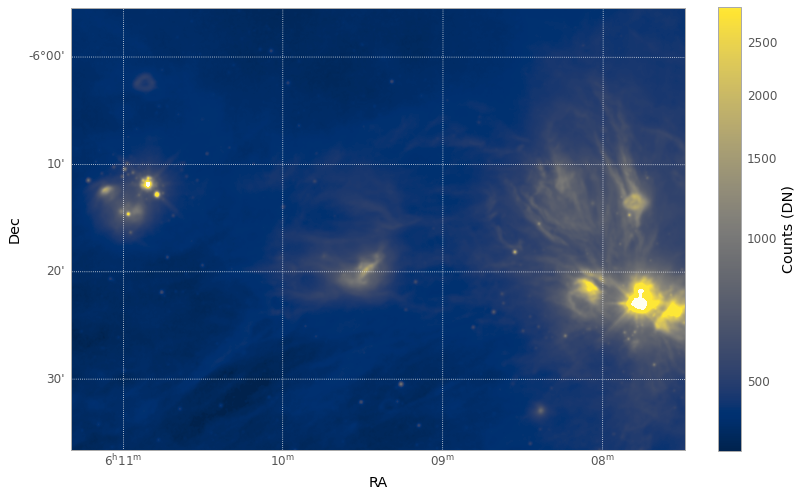

In [25]:
# Replot subimage with correct wcs
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(projection=subwcs)
im =plt.imshow(image_w3_cut, cmap='cividis',origin='lower',norm=colors.PowerNorm(gamma=0.5,  vmax= pcent[1], vmin =pcent[0]))

im_ratio = image_w3_cut.shape[0]/image_w3_cut.shape[1] 
cbar=plt.colorbar(im,fraction=0.046*im_ratio, pad=0.05)
cbar.set_label(label)
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

ax.grid(color='white', ls='dotted')

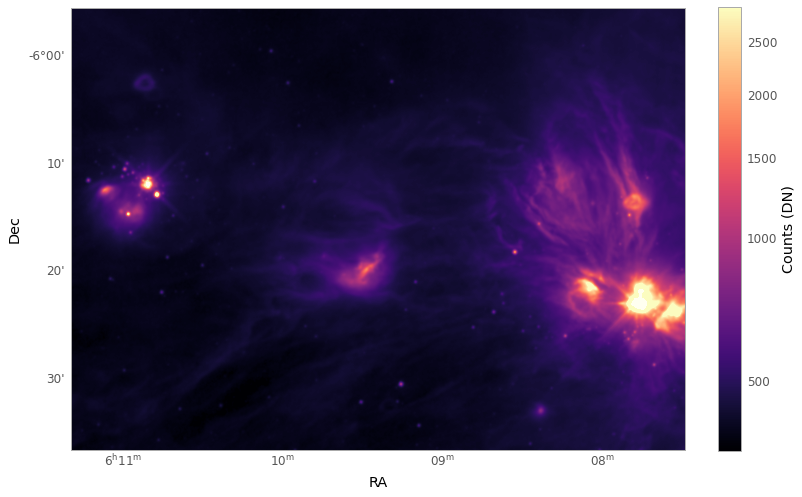

In [26]:
# try another colortable and save image to file
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(projection=subwcs)
im =plt.imshow(image_w3_cut, cmap='magma',origin='lower',norm=colors.PowerNorm(gamma=0.5,  vmax= pcent[1], vmin =pcent[0]))

im_ratio = image_w3_cut.shape[0]/image_w3_cut.shape[1] 
cbar=plt.colorbar(im,fraction=0.046*im_ratio, pad=0.05)
cbar.set_label(label)
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

# ax.grid(color='white', ls='dotted')

fig.savefig("images/Mon_R2_Py_test2.jpg", dpi=300, bbox_inches='tight')

## 3. Unit Conversion

#### Units of DN are not physically useful. More widely used units in astronomy are flux density (e.g Jy). From https://wise2.ipac.caltech.edu/docs/release/prelim/expsup/sec2_3f.html, it can be determined the DN-to-Jy conversion factor for the WISE 12 um band is 2.9045e-6 Jy/DN

In [27]:
from astropy import units as u # import units library
conv = 2.9045e-6 # Jy/DN
image_w3_cut = image_w3_cut*conv*u.Jy #convert to Jy/pixel
pcent=pcent*conv*u.Jy # update plotting range accordingly

In [28]:
pcent.to(u.MJy) # convert to MJy (i.e 1e6 Jy)

<Quantity [0., 0.] MJy>

#### To avoid any dependencies on pixel size, it may be more useful to this WISE image to units of surface brightness (e.g. MJy/sr)

In [29]:
w3_pix = 0.0003819444391411*(u.deg)**2 #from the header the WISE band 3 (12 um) pixel size is found in deg^2
w3_pix = w3_pix.to(u.sr)  # convert pixel size to steradian

image_w3_cut= image_w3_cut.to(u.MJy) #convert to MJy/pix
pcent = pcent.to(u.MJy)

image_w3_cut=(image_w3_cut/w3_pix).value; # convert to MJy/sr (i.e. 1 MJy = 1e6 Jy)
pcent =(pcent/w3_pix).value
pcent*u.MJy/u.sr 

<Quantity [0.0109, 0.0715] MJy / sr>

###### These numbers look low but my calculations check out (Check papers on MIR emission in Mon R2. what does WISE 3 emission in other comparable sources look like?  

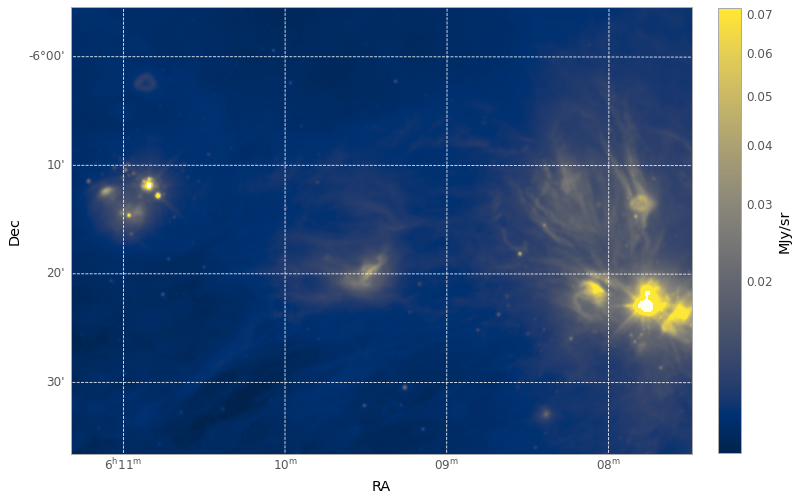

In [30]:
# replot one more time with updated units and save image to file
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(projection=subwcs)
im =plt.imshow(image_w3_cut, cmap='cividis',origin='lower',norm=colors.PowerNorm(gamma=0.5,  vmax= pcent[1], vmin =pcent[0]))
cbar=plt.colorbar(im,fraction=0.046*im_ratio, pad=0.04)
cbar.set_label("MJy/sr")

plt.xlabel(r'RA')
plt.ylabel(r'Dec')

ax.grid(color='white', ls='dashed')

fig.savefig("images/Mon_R2_Py_test.jpg", dpi=300, bbox_inches='tight')

#### Output subimage with updated units and header to fits file

In [31]:
#We can convert between pixel and world coordinates for wcs objects
wcs_mon_r2.pixel_to_world(30,40)

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (93.4345, -6.8238)>

In [1]:
#define new center coordinates in image units
subshape=subwcs.array_shape
c_x= subshape[0]//2
c_y= subshape[1]//2
c_x, c_y

NameError: name 'subwcs' is not defined

In [33]:
#Convert to sky coordinates (degrees)
c_ra,c_dec=subwcs.pixel_to_world_values(c_x, c_y)
c_ra,c_dec=float(c_ra),float(c_dec)
(c_ra,c_dec)*u.deg

<Quantity [92.4846, -6.1341] deg>

In [34]:
#Create header for subimage with relavant keywords updated
header_new=header.copy()
header_new["BUNIT"] = "MJy/sr"
header_new["CRVAL1"] =c_ra
header_new["CRVAL2"] = c_dec
header_new["CRPIX1"] = c_x
header_new["CRPIX2"] = c_y
header_new["NAXIS1"] = subshape[0]
header_new["NAXIS2"] = subshape[1]
header_new

SIMPLE  =                    T / Created with PDL (http://pdl.perl.org)         
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1800 / length of data axis 1                          
NAXIS2  =                 2495 / length of data axis 2                          
BUNIT   = 'MJy/sr  '           / image pixel units                              
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CRVAL1  =      92.484553557694 / RA at CRPIX1,CRPIX2, J2000.0 (deg)             
CRVAL2  =   -6.134139182329934 / Dec at CRPIX1,CRPIX2, J2000.0 (deg)            
EQUINOX =               2000.0 / Equinox of WCS, (year)                         
CTYPE1  = 'RA---SIN'        

In [35]:
# uncomment to produce subimage fits file
# header_data_unit_list[0].header = header_new
# header_data_unit_list[0].data = image_w3_cut
# header_data_unit_list.writeto('fits/monr2_w3_cut_test.fits') 
